In [1]:
'''>>>>> start CodeP3.2F25
    V.P. Carey ME249, Fall 2025

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# (b) Import full dataset from CodeP4.1F25.ipynb and calculate medians
xdata_full = [[-10.0, 1550, 4.464],  
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.695], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.698], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928],
  [-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.466], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]]

ydata_full = [[26.1, 152.8], 
 [26.5, 172.7], 
 [27.9, 191.4], 
 [28.3, 198.0], 
 [29.6, 217.8], 
 [30.1, 224.4],  
 [26.9, 118.8], 
 [27.2, 122.1], 
 [28.8, 136.4], 
 [29.1, 139.6], 
 [30.6, 154.0], 
 [31.0, 158.4],  
 [27.3, 92.4], 
 [27.6, 94.6], 
 [29.2, 105.6], 
 [29.6, 107.8], 
 [31.1, 119.9], 
 [31.5, 123.2],
 [18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]]

# Convert to numpy arrays to calculate medians
xarray_full = np.array(xdata_full)
yarray_full = np.array(ydata_full)

# Define median values of input variables
Tamed = np.median(xarray_full[:, 0])
IDmed = np.median(xarray_full[:, 1])
RLmed = np.median(xarray_full[:, 2])

# Define median values of output variables
VLmed = np.median(yarray_full[:, 0])
Wdmed = np.median(yarray_full[:, 1])

# (b) Normalize data by dividing by medians
xdata_normalized = xarray_full / np.array([Tamed, IDmed, RLmed])
ydata_normalized = yarray_full / np.array([VLmed, Wdmed])

# (c) Randomly split normalized data into training set (2/3) and validation set (1/3)
np.random.seed(42)
indices = np.random.permutation(len(xdata_normalized))
train_size = int(len(xdata_normalized) * 2 / 3)

train_indices = indices[:train_size]
val_indices = indices[train_size:]

xarray = xdata_normalized[train_indices]
yarray = ydata_normalized[train_indices]
xarray_val = xdata_normalized[val_indices]
yarray_val = ydata_normalized[val_indices]

print (xarray)
print (yarray)


[[-1.          0.59090909  0.66666667]
 [ 1.          1.13636364  1.33333333]
 [ 1.          0.86363636  1.33333333]
 [-1.          1.40909091  1.33333333]
 [-1.          0.86363636  1.33333333]
 [ 3.          1.68181818  0.66666667]
 [ 3.          1.68181818  1.33333333]
 [ 3.          0.86363636  1.33333333]
 [ 1.          1.68181818  0.66666667]
 [-1.          0.86363636  1.        ]
 [-1.          1.68181818  1.33333333]
 [ 1.          1.40909091  0.99985066]
 [ 3.          0.31818182  0.66666667]
 [-1.          1.40909091  1.        ]
 [ 1.          0.31818182  1.        ]
 [ 3.          1.40909091  0.66666667]
 [ 1.          1.13636364  1.        ]
 [ 1.          0.86363636  0.66666667]
 [-1.          1.13636364  1.33333333]
 [-1.          1.13636364  1.        ]
 [ 3.          0.31818182  1.33333333]
 [ 1.          1.68181818  1.33333333]
 [ 1.          1.68181818  1.        ]
 [ 3.          1.40909091  1.33333333]
 [-1.          0.31818182  1.        ]
 [ 1.          0.86363636

In [2]:
# (d) Define neural network model for Task 4.1.2

from keras import backend as K
# Initialize weights with values between -0.25 and 0.25
initializer = keras.initializers.RandomUniform(minval= -0.25, maxval=0.25)

# Create Sequential model with 4 hidden layers architecture:
# - Inlet layer: 6 neurons, activation='elu', input_shape=[3]
# - 4 Hidden layers: 6, 9, 13, and 7 neurons
# - Outlet layer: 2 neurons, no activation function
model = keras.Sequential([
    keras.layers.Dense(6, activation='elu', input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(6, activation='elu',  kernel_initializer=initializer),
    keras.layers.Dense(9, activation='elu',  kernel_initializer=initializer),
    keras.layers.Dense(13, activation='elu', kernel_initializer=initializer),
    keras.layers.Dense(7, activation='elu', kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


/opt/anaconda3/envs/Python3-11_Keras_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Compile model with RMSprop optimizer and mean absolute error loss
rms = keras.optimizers.RMSprop(0.0007)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [4]:
# (e) Train the neural network model using model.fit with backpropagation

# Add early stopping callback - monitor validation loss
es = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    patience = 100,
    restore_best_weights = True, 
    verbose=1)

# Add checkpoint to save best model - monitor validation loss
mc = keras.callbacks.ModelCheckpoint('best_model_4.1.2.keras', monitor='val_loss', 
                     mode='min',  verbose=1, save_best_only=True)

# Train model with validation data
historyData = model.fit(xarray, yarray,
                       validation_data=(xarray_val, yarray_val),
                       epochs=3000,
                       callbacks=[es, mc])

# Extract loss history
loss_hist = historyData.history['loss']
val_loss_hist = historyData.history['val_loss']
best_epoch = np.argmin(val_loss_hist) + 1
print ('best epoch = ', best_epoch)
print('smallest training loss =', np.min(loss_hist))

print('smallest validation loss =', np.min(val_loss_hist))

model.save('./best_model_4.1.2.keras')
# Save model

Epoch 1/3000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 1.0112
Epoch 1: val_loss improved from None to 0.98382, saving model to best_model_4.1.2.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.0305 - val_loss: 0.9838
Epoch 2/3000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0087
Epoch 2: val_loss improved from 0.98382 to 0.97778, saving model to best_model_4.1.2.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.0224 - val_loss: 0.9778
Epoch 3/3000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0180
Epoch 3: val_loss improved from 0.97778 to 0.97227, saving model to best_model_4.1.2.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.0164 - val_loss: 0.9723
Epoch 4/3000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0123
Epoch 4: val_loss improved from 0.97227 to 0.96716, saving model to best_model_4.1.2.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.0110 - val_loss: 0.9672
Epoch 5/3000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9900
Epoch 5: val_loss impr

In [5]:
# (f) Compare model predictions with training dataset
import matplotlib.pyplot as plt

# Predict on training set
train_predictions = model.predict(xarray, verbose=0)

# Convert back to original units
train_actual_VL = yarray[:, 0] * VLmed
train_actual_Wd = yarray[:, 1] * Wdmed
train_pred_VL = train_predictions[:, 0] * VLmed
train_pred_Wd = train_predictions[:, 1] * Wdmed

# Calculate mean absolute error for training set
mae_train_VL = np.mean(np.abs(train_actual_VL - train_pred_VL))
mae_train_Wd = np.mean(np.abs(train_actual_Wd - train_pred_Wd))
mae_train_overall = np.mean(np.abs(yarray - train_predictions))

print("=" * 60)
print("(f) Training Set Prediction Results")
print("=" * 60)
print(f"Training MAE (normalized): {mae_train_overall:.6f}")
print(f"Training MAE - Voltage VL: {mae_train_VL:.4f} V")
print(f"Training MAE - Power Wd: {mae_train_Wd:.4f} W")
print("=" * 60)


(f) Training Set Prediction Results
Training MAE (normalized): 0.033845
Training MAE - Voltage VL: 0.5925 V
Training MAE - Power Wd: 5.3300 W


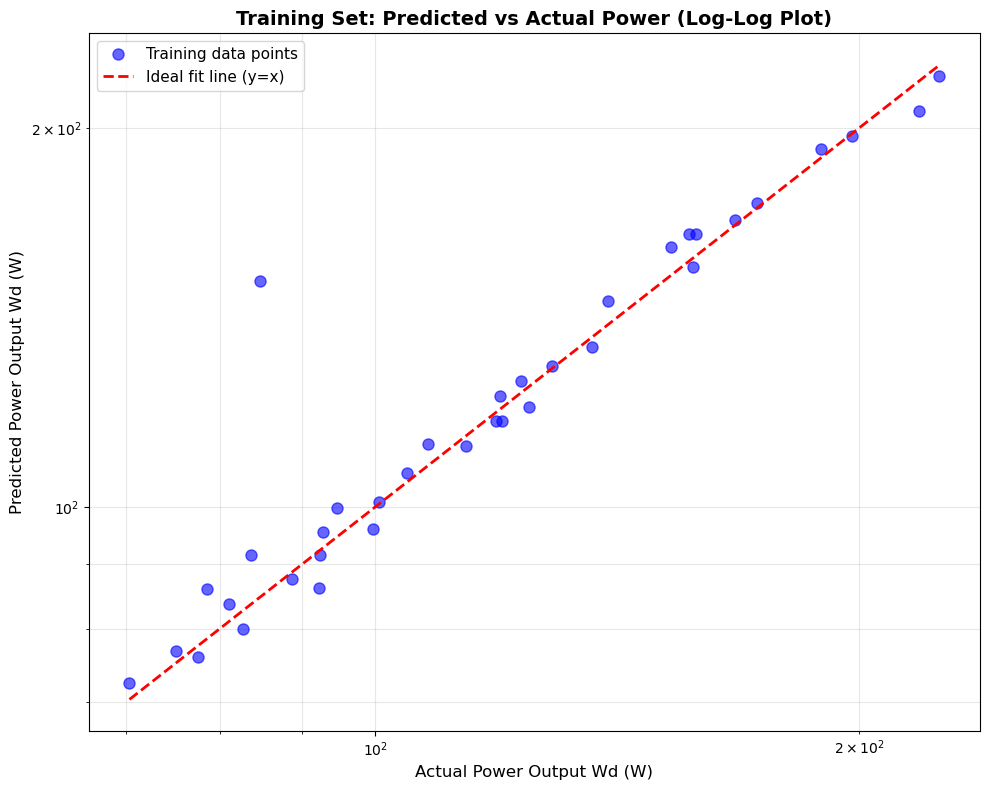

Training samples: 36
Power range: 70.30 W to 224.40 W


In [6]:
# Create log-log plot for training set
fig, ax = plt.subplots(figsize=(10, 8))

# Plot predicted vs actual power output (log-log plot)
ax.loglog(train_actual_Wd, train_pred_Wd, 'bo', markersize=8, alpha=0.6, label='Training data points')
ax.loglog([train_actual_Wd.min(), train_actual_Wd.max()], 
          [train_actual_Wd.min(), train_actual_Wd.max()], 
          'r--', linewidth=2, label='Ideal fit line (y=x)')

ax.set_xlabel('Actual Power Output Wd (W)', fontsize=12)
ax.set_ylabel('Predicted Power Output Wd (W)', fontsize=12)
ax.set_title('Training Set: Predicted vs Actual Power (Log-Log Plot)', fontsize=14, fontweight='bold')
ax.grid(True, which="both", ls="-", alpha=0.3)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"Training samples: {len(train_actual_Wd)}")
print(f"Power range: {train_actual_Wd.min():.2f} W to {train_actual_Wd.max():.2f} W")


In [7]:
# (g) Compare model predictions with validation dataset

# Predict on validation set
val_predictions = model.predict(xarray_val, verbose=0)

# Convert back to original units
val_actual_VL = yarray_val[:, 0] * VLmed
val_actual_Wd = yarray_val[:, 1] * Wdmed
val_pred_VL = val_predictions[:, 0] * VLmed
val_pred_Wd = val_predictions[:, 1] * Wdmed

# Calculate mean absolute error for validation set
mae_val_VL = np.mean(np.abs(val_actual_VL - val_pred_VL))
mae_val_Wd = np.mean(np.abs(val_actual_Wd - val_pred_Wd))
mae_val_overall = np.mean(np.abs(yarray_val - val_predictions))

print("=" * 60)
print("(g) Validation Set Prediction Results")
print("=" * 60)
print(f"Validation MAE (normalized): {mae_val_overall:.6f}")
print(f"Validation MAE - Voltage VL: {mae_val_VL:.4f} V")
print(f"Validation MAE - Power Wd: {mae_val_Wd:.4f} W")
print("=" * 60)


(g) Validation Set Prediction Results
Validation MAE (normalized): 0.048708
Validation MAE - Voltage VL: 0.9333 V
Validation MAE - Power Wd: 7.3273 W


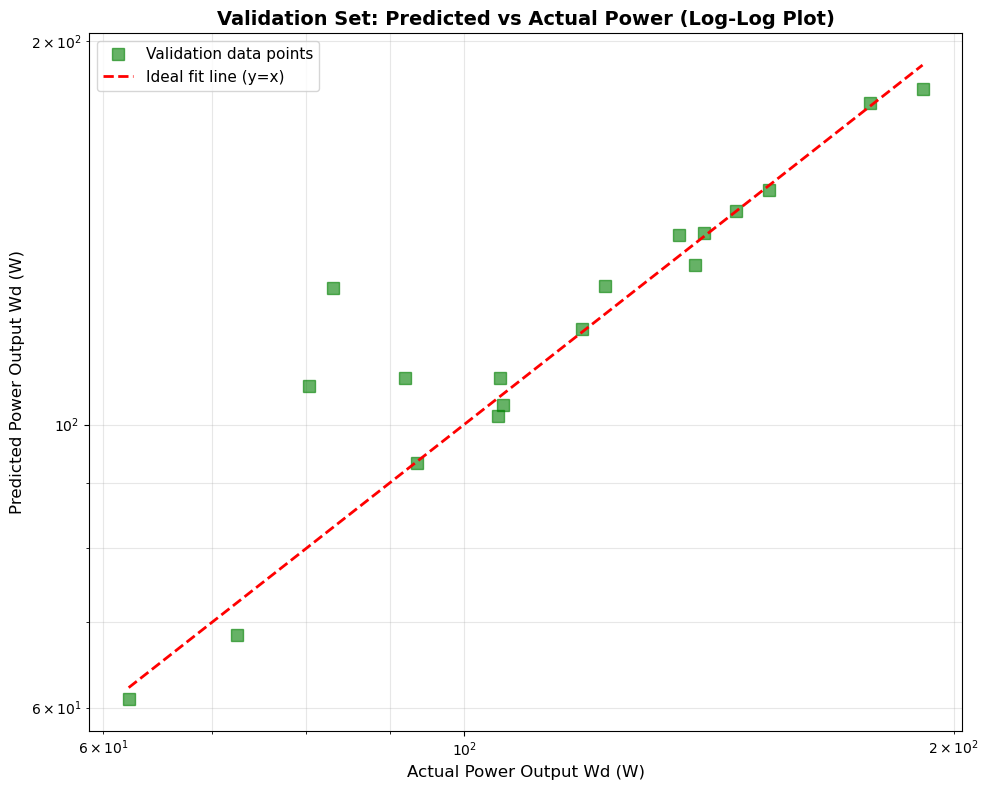

Validation samples: 18
Power range: 62.20 W to 191.40 W


In [8]:
# Create log-log plot for validation set
fig, ax = plt.subplots(figsize=(10, 8))

# Plot predicted vs actual power output (log-log plot)
ax.loglog(val_actual_Wd, val_pred_Wd, 'gs', markersize=8, alpha=0.6, label='Validation data points')
ax.loglog([val_actual_Wd.min(), val_actual_Wd.max()], 
          [val_actual_Wd.min(), val_actual_Wd.max()], 
          'r--', linewidth=2, label='Ideal fit line (y=x)')

ax.set_xlabel('Actual Power Output Wd (W)', fontsize=12)
ax.set_ylabel('Predicted Power Output Wd (W)', fontsize=12)
ax.set_title('Validation Set: Predicted vs Actual Power (Log-Log Plot)', fontsize=14, fontweight='bold')
ax.grid(True, which="both", ls="-", alpha=0.3)
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"Validation samples: {len(val_actual_Wd)}")
print(f"Power range: {val_actual_Wd.min():.2f} W to {val_actual_Wd.max():.2f} W")


In [9]:
# (h) Create power output surface plot
# Fixed air temperature Ta = 20°C
# RL range: 4 to 8 Ohms
# ID range: 500 to 1900 W/m²

# Create grid
RL_range = np.linspace(4, 8, 50)
ID_range = np.linspace(500, 1900, 50)
RL_grid, ID_grid = np.meshgrid(RL_range, ID_range)

# Fixed temperature Ta = 20°C
Ta_fixed = 20.0

# Create input data (normalized)
n_points = RL_grid.size
input_data = np.zeros((n_points, 3))
input_data[:, 0] = (Ta_fixed / Tamed) * np.ones(n_points)  # Normalized temperature
input_data[:, 1] = (ID_grid.flatten() / IDmed)              # Normalized irradiance
input_data[:, 2] = (RL_grid.flatten() / RLmed)              # Normalized load resistance

# Make predictions
predictions_surface = model.predict(input_data, verbose=0)

# Convert power output back to original units
Wd_predicted = predictions_surface[:, 1] * Wdmed
Wd_grid = Wd_predicted.reshape(RL_grid.shape)

print("=" * 60)
print("(h) Power Output Surface Prediction")
print("=" * 60)
print(f"Fixed temperature: Ta = {Ta_fixed}°C")
print(f"Load resistance range: {RL_range.min():.1f} Ω to {RL_range.max():.1f} Ω")
print(f"Irradiance range: {ID_range.min():.0f} W/m² to {ID_range.max():.0f} W/m²")
print(f"Predicted power range: {Wd_grid.min():.2f} W to {Wd_grid.max():.2f} W")
print("=" * 60)


(h) Power Output Surface Prediction
Fixed temperature: Ta = 20.0°C
Load resistance range: 4.0 Ω to 8.0 Ω
Irradiance range: 500 W/m² to 1900 W/m²
Predicted power range: 90.37 W to 222.82 W


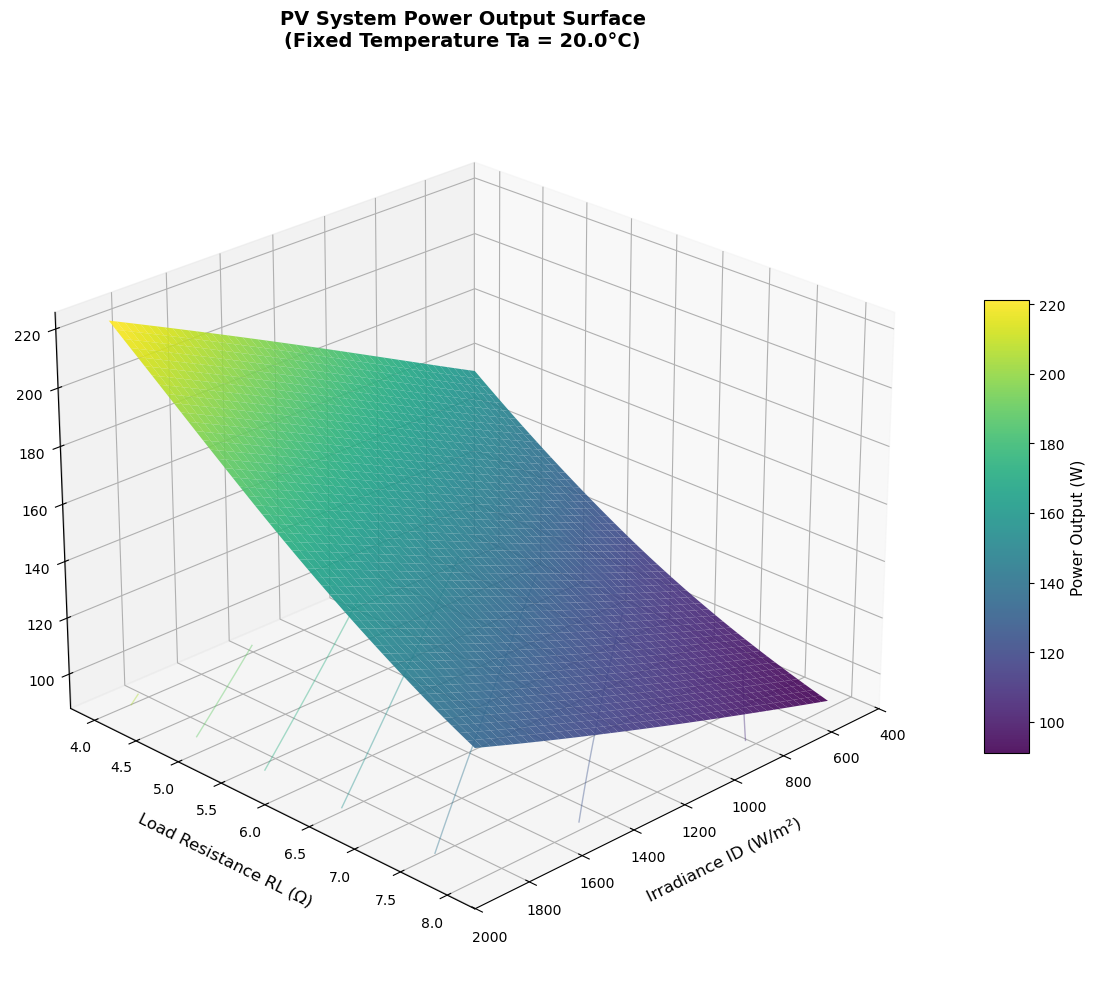

In [10]:
# Plot 3D surface
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(ID_grid, RL_grid, Wd_grid, cmap='viridis', 
                       alpha=0.9, edgecolor='none', antialiased=True)

# Add contour projection
contours = ax.contour(ID_grid, RL_grid, Wd_grid, zdir='z', offset=Wd_grid.min(), 
                      cmap='viridis', alpha=0.4, linewidths=1)

# Set labels
ax.set_xlabel('Irradiance ID (W/m²)', fontsize=12, labelpad=10)
ax.set_ylabel('Load Resistance RL (Ω)', fontsize=12, labelpad=10)
ax.set_zlabel('Power Output Wd (W)', fontsize=12, labelpad=10)
ax.set_title(f'PV System Power Output Surface\n(Fixed Temperature Ta = {Ta_fixed}°C)', 
             fontsize=14, fontweight='bold', pad=20)

# Add color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Power Output (W)', fontsize=11)

# Adjust viewing angle
ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()
